In this file we'll look how to make chisquare technique applicable to cross tables, that show how two categorical columns interact. For instance, here's a table showing the relationship between sex and high_income
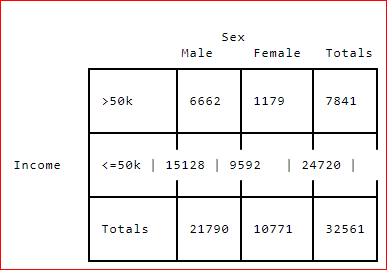

We might see a pattern between sex and high_income. But it's hard to immediately quantify that pattern, and tell if it's significant. We can apply the chi-squared test (also known as [the chi-squared test of association](https://en.wikipedia.org/wiki/Chi-squared_test)) to figure out if there's a statistically significant correlation between two categorical columns.

In the single category chi-squared test, we find expected values from other data sets, and then compare with our own observed values. In a multiple category chi-squared test, we calculate expected values across our whole dataset. We'll illustrate this by converting our chart into proportions: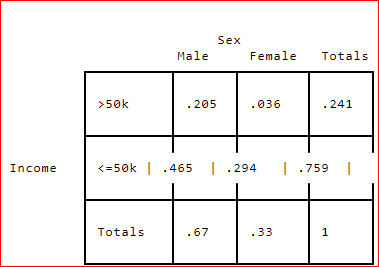

* 20.5% of Males in the whole data set earn >50k in income.
* 33% of the whole dataset is Female
* 75.9% of the whole dataset earns <=50k.

We can use our total proportions to calculate expected values. 24.1% of all people in income earn >50k, and 33% of all people in income are Female, so we'd expect the proportion of people who are female and earn >50k to be 0.241 * 0.33, which is 0.07953. We have this expectation based on the proportions of Females and >50k earners across the whole dataset. Instead, we see that the observed proportion is 0.036, which indicates that there may be some correlation between the sex and high_income columns.

We can convert our expected proportion to an expected value by multiplying by 32561, the total number of rows in the data set, which gives us 32561 * 0.07953, or 2589.6.

In [4]:
# Using the expected proportions in the table above, calculate the expected values for each of the 4 cells in the table

males_over50k = .241*.67*32561

males_under50k = .759*.67*32561

females_over50k = .241*.33*32561

females_under50k = .759*.33*32561

print(males_over50k)
print(males_under50k)
print(females_over50k)
print(females_under50k)

5257.62467
16558.24533
2589.5763300000003
8155.553670000001


Now that we have our expected values, we can calculate the chi-squared value

In [6]:
observed = [6662, 1179, 15128, 9592]
expected = [5249.8, 2597.4, 16533.5, 8180.3]
values = []

for i in range(len(observed)):
    exp = expected[i]
    obs = observed[i]
    value = (exp-obs)**2/exp
    values.append(value)
    
values

[379.88282220275045, 774.5663201663202, 119.48046390661385, 243.62149187682596]

In [7]:
chisq_gender_income = sum(values)
chisq_gender_income

1517.5510981525103

Now that we've found our chi-squared value, 1520.0, we can use the same technique with the chi-squared sampling distribution to find a p-value associated with the chi-squared value. The p-value will tell us whether the difference between the observed and expected values is statistically significant or not.

Rather than construct a sampling distribution again manually, we'll use the scipy.stats.chisquare function 

In [10]:
import pandas as pd
from scipy.stats import chisquare

chisq_value, pvalue_gender_income = chisquare(observed,expected )
pvalue_gender_income

0.0

We can also scale up the chi-squared test to cases where each category contains more than two possibilities. For example where we look at sex vs race.

Before we can find the chi-squared value, we need to find the observed frequency counts. We can do this using the [pandas.crosstab function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html). The crosstab function will print a table that shows frequency counts for two or more columns

In [12]:
income = pd.read_csv("income.csv")
table = pd.crosstab(income["sex"], [income["high_income"]])
table

high_income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


In [15]:
table = pd.crosstab(income["sex"], [income["race"]])
table

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Female,119,346,1555,109,8642
Male,192,693,1569,162,19174


Now that we have the observed frequency counts, we can generate the expected values. We can use the [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html) function to do this. The function takes in a cross table of observed counts, and returns the chi-squared value, the p-value, the degrees of freedom, and the expected frequencies.

In [18]:
from scipy.stats import chi2_contingency

chisq_value, p_value, df, expexted = chi2_contingency(table)

In [20]:
#df is a degree of Freedom
df

4

In statistics, the number of degrees of freedom is the number of values in the final calculation of a statistic that are free to vary. The number of independent ways by which a dynamic system can move, without violating any constraint imposed on it, is called number of degrees of freedom.

Now that we've learned the chi-squared test, we should be able to figure out if the association between two columns of categorical data is statistically significant or not. There are a few caveats to using the chi-squared test that are important to cover, though:

* Finding that a result isn't significant doesn't mean that no association between the columns exists. For instance, if we found that the chi-squared test between the sex and race columns returned a p-value of .1, it wouldn't mean that there is no relationship between sex and race. It just means that there isn't a statistically significant relationship

* Finding a statistically significant result doesn't imply anything about what the correlation is. For instance, finding that a chi-squared test between sex and race results in a p-value of .01 doesn't mean that the dataset contains too many Females who are White (or too few). A statistically significant finding means that some evidence of a relationship between the variables exists, but needs to be investigated further.

* Chi-squared tests can only be applied in the case where each possibility within a category is independent. For instance, the Census counts individuals as either Male or Female, not both.

* Chi-squared tests are more valid when the numbers in each cell of the cross table are larger. So if each number is 100, great -- if each number is 1, you may need to gather more data.

Chi-squared tests can be a powerful tool to discover correlations and figure out when anomalies in data should be investigated further.